In [2]:
from google.colab import drive
import pandas as pd

Mounted at /content/drive/


In [3]:
import pandas as pd 
import numpy as np # linear algebra
import math
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/') #If using Google Colab

## DATA PREPROCESSING AND DATA CLEANING:

In [4]:
data_files = ['drive/MyDrive/2020-present.csv','drive/MyDrive/2010-2019.csv']
df_crime_report = pd.concat(map(lambda file: pd.read_csv(file, parse_dates = ['Date Rptd','DATE OCC','TIME OCC']), data_files))
df_crime_report.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,10304468,2020-01-08,2020-01-08,2230,3.0,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,NaN
1,190101086,2020-01-02,2020-01-01,0330,1.0,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,NaN
2,201418201,2020-10-03,2020-09-29,1830,14.0,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1300 0344 1606 2032,63,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,NaN
3,191501505,2020-01-01,2020-01-01,1730,15.0,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,NaN
4,191921269,2020-01-01,2020-01-01,0415,19.0,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,NaN


In [5]:
df_crime_report.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA              2127357
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            258007
Vict Age                0
Vict Sex           226639
Vict Descent       226693
Premis Cd              48
Premis Desc           243
Weapon Used Cd    1517063
Weapon Desc       1517063
Status                  2
Status Desc             0
Crm Cd 1               12
Crm Cd 2          2140666
Crm Cd 3          2292489
Crm Cd 4          2296704
LOCATION                0
Cross Street      1907416
LAT                     0
LON                     0
AREA               169478
dtype: int64

In [6]:
df_crime_report['AREA NAME'].value_counts()

77th Street    154412
Southwest      144281
Southeast      128247
Pacific        125783
N Hollywood    122190
Mission        118260
Northeast      116147
Central        107762
Hollywood      107151
Olympic        106821
Devonshire     106745
Van Nuys       105854
Newton         103569
West Valley    100247
Harbor          99055
Wilshire        97666
Rampart         96826
Topanga         93137
West LA         92566
Foothill        85808
Hollenbeck      84308
Name: AREA NAME, dtype: int64

In [7]:
len(df_crime_report)

2296835

In [8]:
data = df_crime_report.drop(columns=['DR_NO', 'Date Rptd','AREA','AREA ','Part 1-2','Crm Cd Desc','Mocodes','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street','LAT','LON'])

In [9]:
data['Rpt Dist No'].value_counts()

645     11605
363     10858
646     10050
1494     9120
636      8873
        ...  
794         1
797         1
718         1
1652        1
716         1
Name: Rpt Dist No, Length: 1294, dtype: int64

In [10]:
data.head()

,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent
0,2020-01-08,2230,Southwest,377,624,36,F,B
1,2020-01-01,0330,Central,163,624,25,M,H
2,2020-09-29,1830,Pacific,1454,420,63,M,H
3,2020-01-01,1730,N Hollywood,1543,745,76,F,W
4,2020-01-01,0415,Mission,1998,740,31,X,X


In [11]:
data['Date'] = pd.to_datetime(data['DATE OCC'])

In [12]:
data['Day'] = data['Date'].dt.day_name()

In [13]:
data.head()

,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Date,Day
0,2020-01-08,2230,Southwest,377,624,36,F,B,2020-01-08,Wednesday
1,2020-01-01,0330,Central,163,624,25,M,H,2020-01-01,Wednesday
2,2020-09-29,1830,Pacific,1454,420,63,M,H,2020-09-29,Tuesday
3,2020-01-01,1730,N Hollywood,1543,745,76,F,W,2020-01-01,Wednesday
4,2020-01-01,0415,Mission,1998,740,31,X,X,2020-01-01,Wednesday


In [14]:
data.dtypes

DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Rpt Dist No              int64
Crm Cd                   int64
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Date            datetime64[ns]
Day                     object
dtype: object

In [15]:
data['TIME OCC'] = data['TIME OCC'].astype('int64')


In [16]:
data['TIME OCC'] = data['TIME OCC'].apply(lambda x: x/2400)

In [17]:
data['Day'] = data['Day'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday':6})

In [18]:
data = data.drop(columns=['DATE OCC', 'Date'])


In [19]:
data.head()

,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Day
0,0.929167,Southwest,377,624,36,F,B,3
1,0.137500,Central,163,624,25,M,H,3
2,0.762500,Pacific,1454,420,63,M,H,2
3,0.720833,N Hollywood,1543,745,76,F,W,3
4,0.172917,Mission,1998,740,31,X,X,3


In [20]:
data.isnull().sum()

TIME OCC             0
AREA NAME            0
Rpt Dist No          0
Crm Cd               0
Vict Age             0
Vict Sex        226639
Vict Descent    226693
Day                  0
dtype: int64

In [21]:
data['Vict Sex'] = data['Vict Sex'].fillna('UKN')
data['Vict Descent'] = data['Vict Descent'].fillna('UKN')

In [22]:
data.isnull().sum()

TIME OCC        0
AREA NAME       0
Rpt Dist No     0
Crm Cd          0
Vict Age        0
Vict Sex        0
Vict Descent    0
Day             0
dtype: int64

In [23]:
len(data)

2296835

In [24]:
data['Rpt Dist No'].unique().sum()

1482688

CATEGORSING CRIME CODES TO LESSER NUMBER

In [25]:
data['Crm Cd'].value_counts().sort_index()[0:35]

110      3147
113        11
121     11091
122      1165
210     90130
220     13163
230    106095
231      2017
235      1725
236     19875
237      5204
250       416
251      2982
310    157191
320     13344
330    173120
331     37492
341     75774
343      5097
345       182
347        47
349        13
350     15836
351      1156
352      1051
353        44
354    129163
410      3020
420     99555
421      1562
432         2
433       550
434      1049
435        59
436        25
Name: Crm Cd, dtype: int64

In [26]:
def categorise_crimes_against_people(x):
  if x in range(207,211):
    return 0 #kidnap
  if x in range(220,222):
    return 1 #intent to murder or commit felony
  elif x in range(230,231):
    return 2 #crime against employers
  elif x in range(236,238):
    return 3 #Human trafficking
  elif x in range(302,311):
    return 4 #crime against religion and offence against good morals
  elif x in range(346,368):
    return 5 #injuries
  elif x in range(403,423):
    return 6 #crimes against public peace

In [27]:
data_0 = data
data_0['Crime Type'] = data_0['Crm Cd'].apply(categorise_crimes_against_people)
data_0 = data_0.dropna()
data_0.head()

,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Day,Crime Type
2,0.762500,Pacific,1454,420,63,M,H,2,6.0
19,0.554167,Central,152,210,66,M,B,2,0.0
24,0.291667,Central,166,230,62,M,A,3,2.0
28,0.833333,Central,111,230,71,M,W,0,2.0
31,0.250000,Central,111,310,51,M,W,4,4.0


In [28]:
len(data_0)

643105

In [29]:
data_0 = data_0.drop(columns=['Crm Cd'])

NEURAL NETWORK APPROACH

Crime Against the Person

In [30]:
data_0.head()

,TIME OCC,AREA NAME,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Day,Crime Type
2,0.762500,Pacific,1454,63,M,H,2,6.0
19,0.554167,Central,152,66,M,B,2,0.0
24,0.291667,Central,166,62,M,A,3,2.0
28,0.833333,Central,111,71,M,W,0,2.0
31,0.250000,Central,111,51,M,W,4,4.0


In [31]:
datann3 = data_0
datann3 = datann3[datann3['Vict Sex'] != 'UKN']
datann3 = datann3[datann3['Vict Descent'] != 'UKN']

In [32]:
datann3['AREA NAME'] = datann3['AREA NAME'].astype('category')
datann3['AREA NAME'] = datann3['AREA NAME'].cat.codes
datann3['Vict Sex'] = datann3['Vict Sex'].map({'M':0,'F':1,'X':2,'H':3,'N':4,'UKN':5})
datann3['Vict Descent'] = datann3['Vict Descent'].map({'H':0,'W':1,'B':2,'O':3,'X':4,'A':5,'K':6,'F':7,'C':8,'I':9,'J':10,'P':11,'V':12,'U':13,'Z':14,'G':15,'S':16,'D':17,'L':18,'-':19,'UKN':20})
X = datann3.drop(columns=['Crime Type'])
y = datann3['Crime Type']

In [33]:
datann3.head()

,TIME OCC,AREA NAME,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Day,Crime Type
2,0.762500,12,1454,63,0,0,2,6.0
19,0.554167,1,152,66,0,2,2,0.0
24,0.291667,1,166,62,0,5,3,2.0
28,0.833333,1,111,71,0,1,0,2.0
31,0.250000,1,111,51,0,1,4,4.0


In [34]:
X.dtypes

TIME OCC        float64
AREA NAME          int8
Rpt Dist No       int64
Vict Age          int64
Vict Sex          int64
Vict Descent      int64
Day               int64
dtype: object

In [35]:
# apply normalization techniques
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min()) 

In [36]:
X.head()

,TIME OCC,AREA NAME,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Day
2,0.775657,0.60,0.645069,0.657143,0.0,0.000000,0.333333
19,0.563613,0.05,0.024774,0.685714,0.0,0.111111,0.333333
24,0.296438,0.05,0.031444,0.647619,0.0,0.277778,0.500000
28,0.847752,0.05,0.005241,0.733333,0.0,0.055556,0.000000
31,0.254029,0.05,0.005241,0.542857,0.0,0.055556,0.666667


In [37]:
y.head()

2     6.0
19    0.0
24    2.0
28    2.0
31    4.0
Name: Crime Type, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
y_test_copy = y_test
from tensorflow.keras.utils import to_categorical
l = len(y_train.value_counts().index)
y_test = to_categorical(y_test,num_classes = l)
y_train = to_categorical(y_train,num_classes = l)

SKIP the following if you are not going to train the model but load the saved model.

## TRAINING MODEL:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# define the  model
model = Sequential()
model.add(Dense(1000, input_dim=X_test.shape[1], activation=LeakyReLU(alpha=0.001)))
model.add(Dense(600,activation=LeakyReLU()))
model.add(Dense(175,activation=LeakyReLU()))
model.add(Dense(50,activation=LeakyReLU()))
model.add(Dense(l, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=2, min_lr=0.00001)

In [ ]:
model.fit(X_train, y_train, epochs=300,callbacks=[reduce_lr], batch_size=200, verbose=2)

Epoch 1/300
2425/2425 - 54s - loss: 1.5735 - accuracy: 0.3660 - lr: 0.0100 - 54s/epoch - 22ms/step
Epoch 2/300
2425/2425 - 53s - loss: 1.5208 - accuracy: 0.3905 - lr: 0.0100 - 53s/epoch - 22ms/step
Epoch 3/300
2425/2425 - 53s - loss: 1.4997 - accuracy: 0.4001 - lr: 0.0100 - 53s/epoch - 22ms/step
Epoch 4/300
2425/2425 - 53s - loss: 1.4914 - accuracy: 0.4055 - lr: 0.0100 - 53s/epoch - 22ms/step
Epoch 5/300
2425/2425 - 54s - loss: 1.4852 - accuracy: 0.4095 - lr: 0.0100 - 54s/epoch - 22ms/step
Epoch 6/300
2425/2425 - 53s - loss: 1.4823 - accuracy: 0.4119 - lr: 0.0100 - 53s/epoch - 22ms/step
Epoch 7/300
2425/2425 - 53s - loss: 1.4791 - accuracy: 0.4133 - lr: 0.0100 - 53s/epoch - 22ms/step
Epoch 8/300
2425/2425 - 54s - loss: 1.4780 - accuracy: 0.4135 - lr: 0.0100 - 54s/epoch - 22ms/step
Epoch 9/300
2425/2425 - 55s - loss: 1.4763 - accuracy: 0.4157 - lr: 0.0100 - 55s/epoch - 23ms/step
Epoch 10/300
2425/2425 - 54s - loss: 1.4757 - accuracy: 0.4167 - lr: 0.0100 - 54s/epoch - 22ms/step
Epoch 11/

In [ ]:
#model.save('drive/MyDrive/model.h5') #If using Google Colab
#model.save('model.h5')

INFO:tensorflow:Assets written to: drive/MyDrive/model/assets


INFO:tensorflow:Assets written to: drive/MyDrive/model/assets


In [ ]:
model.save('drive/MyDrive/model.h5')

## LOAD SAVED MODEL:

In [40]:
import keras
reconstructed_model = keras.models.load_model("drive/MyDrive/model.h5")

In [47]:
y_pred = reconstructed_model.predict(X_test) #predict

In [48]:
y_pred_sort = np.argsort(y_pred, axis=1)

In [49]:
y_pred_sort.shape

(121217, 7)

In [50]:
y_pred_sort[1]

array([3, 4, 5, 1, 6, 0, 2])

### Predicting top 3 crimes:

In [51]:
y_pred_2 = np.delete(y_pred_sort, [0,1,2,3], axis=1)

In [52]:
y_pred_2[3]

array([6, 4, 5])

In [53]:
def new_accuracy(pred,true):
  l = []
  for i in range(len(true)):
    if true[i] in pred[i]:
      l.append(1)
    else:
      l.append(0)

  acc = sum(l)/len(l)
  print(acc)


In [55]:
x = np.array(y_test_copy)

In [57]:
new_accuracy(y_pred_2,x)

0.8066772812394302


## Predicting top 2 crimes:

In [58]:
y_pred_2 = np.delete(y_pred_sort, [0,1,2,3,4], axis=1)

In [59]:
y_pred_2[3]

array([4, 5])

In [60]:
x = np.array(y_test_copy)

In [61]:
new_accuracy(y_pred_2,x)

0.6770007507197835


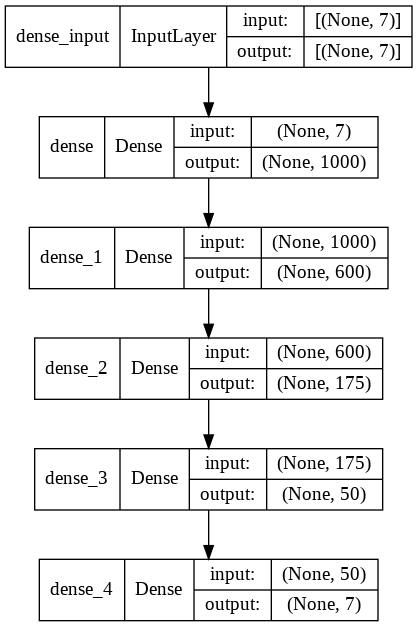

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(reconstructed_model, show_shapes=True)